# San Francisco Crime data


#### Here are some examples on visualizing the data for the San Francisco Crime Classification challenge on Kaggle.com. In this script, I am using Seaborn for the majority of the plotting and Pandas for dataframe generation and organization. 

Download data here https://www.kaggle.com/c/sf-crime/data


### Import packages etc

In [325]:
%matplotlib inline
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set general display style for Seaborn
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set(font_scale=1.5)  

### Load data

In [516]:
crime_df = pd.read_csv("/Users/KRich/GitHub/data/SF crime/train.csv")
# remove address, resolution and description
crime_df = crime_df.drop(['Address','Resolution','Descript'],axis=1)
crime_df.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


### Sort data and set the order for plotting

In [519]:
# convert dates to datetime (pd.to_datatime(df))
crime_df['Dates']=pd.to_datetime(crime_df["Dates"])
# year data ---------------------------------
crime_df['Year']  = crime_df['Dates'].dt.year
crime_df['Year']  = crime_df['Year'].astype(str)
# month data (replace with names) ------------d
crime_df['Month'] = crime_df['Dates'].dt.month
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
             6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
             11:'Nov', 12:'Dec'}
month_order       = [k for k in month_map.values()] 
crime_df['Month'].replace(month_map, inplace=True)
# Hour data -------------------------------------
crime_df['Hour']  = crime_df['Dates'].dt.hour
crime_df['Hour']  = crime_df['Hour'].astype(str)
# week data
day_order = ['Mon', 'Tue', 'Wed', 
             'Thu', 'Fri', 'Sat', 'Sun']

Order we want data to be plotted with

In [520]:
# order of hours------
order_Hour = list(range(24))
for i in order_Hour: 
    order_Hour[i]=str(order_Hour[i])
# order of days ------
order_DayOfWeek= ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
# order of months -----
order_Month = [k for k in month_map.values()] 
# order of years
order_Year = sorted(crime_df.Year.unique().tolist())
# data order for plotting
arg_order = {}
arg_order['Hour']      =  order_Hour
arg_order['DayOfWeek'] =  order_DayOfWeek
arg_order['Month']     =  order_Month
arg_order['Year']      =  order_Year
# color palletes for plotting
color_order = {}
color_order['Hour']      =  'Reds_r'
color_order['DayOfWeek'] =  'Blues_r'
color_order['Month']     =  'Greens_r'
color_order['Year']      =  'GnBu_d'

## PLOT

#### BAR and BOX PLOT HELPER
First, becasue we will be repeating the same plots for different data, we can simplify by making a plotting helper function

In [521]:
#-------------------------
# BAR and BOX PLOT HELPER
#    since we will be repeating the same plots for different data, 
#    we can simplify by making a plotting helper function
#-------------------------
# argument 1 is plotted on x-axis, 
#      ex: boxbar_main('Year'), plot count per year
# argument 1 is plotted wrt argument 2, 
#     ex: boxbar_main('Year','Month') plot avg count per month for each year
# arguement 3 is a specified value of arugment 2, 
#     ex: boxbar_main('Year','Month', 'May'), plot avg count per the month of may for each year
#=======================

def plot_helper(plot, arg):
    plot.set_xlabel(str(arg))
    plot.set_ylabel('Count of crimes')
    _ = plt.setp(plot.get_xticklabels(), rotation=90)
    plt.tight_layout()
#------------------------
# count crimes for arg --
def crime_count(*arg):
    arg1 = str(arg[0])
    if len(arg)==3:
        arg2 = str(arg[1])
        arg3 = str(arg[2])
        crime_count_df1 = crime_df.loc[crime_df[arg2] == arg3]
        crime_count_df = crime_count_df1[["Category",arg1]].groupby([arg1],as_index=False).count()
    elif len(arg)==2:
        arg2= str(arg[1])
        crime_count_df = crime_df[[arg1,arg2, "Category"]].groupby([arg1,arg2],as_index=False).count()
    elif len(arg)==1:
        crime_count_df = crime_df[[arg1, "Category"]].groupby([arg1],as_index=False).count()
    else:
        print('Can only supply 2 arguments')
    return crime_count_df
#------------------------ 
# box and bar plot ------
# first argument is plotted wrt second argument
def make_box_plot(*arg):
    # data
    crime_count_df = crime_count(*arg)
    # boxplot -----------
    axis2 =  plt.subplot2grid((2,2),(0,1))
    box_plot = sns.boxplot(x=str(arg[0]), y="Category", data=crime_count_df,
                           palette=color_order[str(arg[0])],
                           order=arg_order[str(arg[0])],ax=axis2)
    plot_helper(box_plot, arg[0])
    return box_plot

def make_bar_plot(*arg):
    crime_count_df = crime_count(*arg)
    # boxplot -----------
    axis1 =  plt.subplot2grid((2,2),(0,0))
    bar_plot = sns.barplot(x=str(arg[0]), y="Category", data=crime_count_df,
                           palette=color_order[str(arg[0])],
                           order=arg_order[str(arg[0])],
                           alpha=.95, ax=axis1) 
    plot_helper(bar_plot, arg[0])
    return bar_plot

def boxbar_main(*arg):
    plt.figure(figsize=(14,10))
    bar_plot = make_bar_plot(*arg)
    box_plot = make_box_plot(*arg)
    return bar_plot, box_plot



### Average crimes per month every year
Plot average value (barplot) and check for outliers (boxplot)

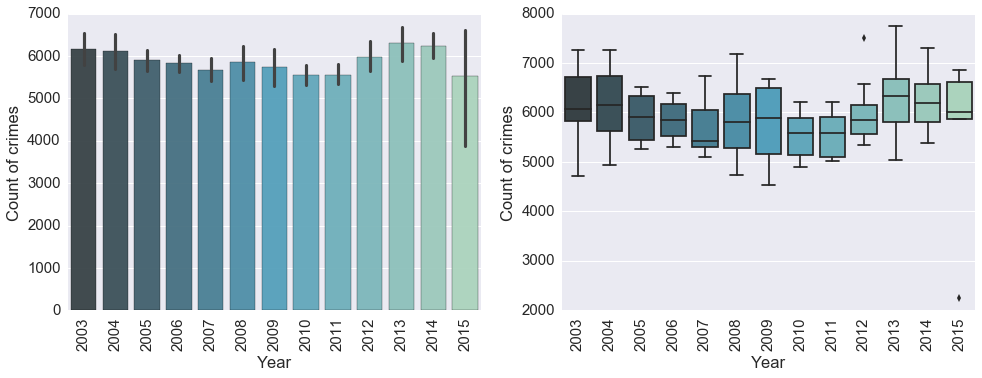

In [334]:
boxbar_main('Year','Month')

#### _Note_: There is a big outlier in 2015. We should investigate further to see if data is missing and/or we should drop 2015 data.

Lets investigate 2015 a little more directly.


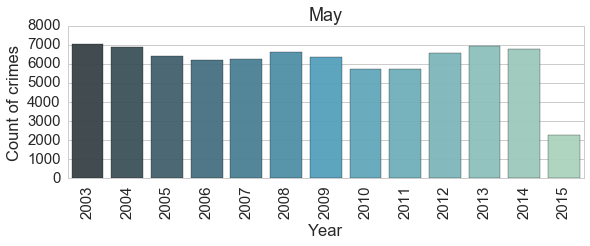

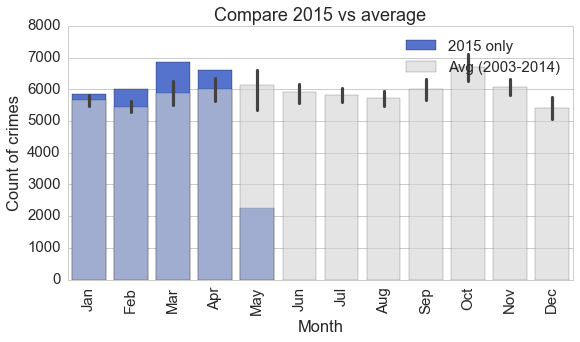

In [396]:

#=================================================
# lets look at may only
plt.figure(figsize=(16,6))

axis1=  plt.subplot2grid((1,3),(0,1),colspan=3)
maybar = make_bar_plot('Year','Month','May')
maybar.set_title('May')

#=================================================
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")
axis2=  plt.subplot2grid((2,3),(1,0),colspan=2)
# count for 2015 only ---------------
yearval = crime_df.loc[crime_df['Year'] == '2015']
Month_count = yearval[["Month", "Category"]].groupby(['Month'],as_index=False).count()
monthbar = sns.barplot(x='Month', y='Category', data=Month_count,color="royalblue",
                   order=order_Month, ax=axis2, label="2015 only")
monthbar.set_xlabel('Month')
monthbar.set_ylabel('Count of crimes')
# average per month-------------
yearval = crime_df.loc[crime_df['Year'] != '2015']
Month_count = crime_df[["Month", "Category","Year"]].groupby(['Month','Year'],as_index=False).count()
monthbar = sns.barplot(x='Month', y='Category', data=Month_count,color="lightgrey",
                   order=order_Month, ax=axis2, alpha=.6, label='Avg (2003-2014)')
monthbar.set_xlabel('Month')
monthbar.set_ylabel('Count of crimes')
monthbar.set_title('Compare 2015 vs average')
_ = plt.setp(monthbar.get_xticklabels(), rotation=90)
plt.legend();


May 2015 is suspicious, it looks like possibly the whole month was not recorded. We can either replace values for this month with average values, drop the month or the year. Considering there is no data after June 2015, lets just drop the year to simplify. 

In [522]:
# remove/drop data from 2015 since its not complete:
crime_df = crime_df[crime_df.Year != '2015']

After dropping 2015, we can visualize our results of the full data set. 

## Crimes per month year-to-year (2003-2014)

Note that there isnt a dramatic or significant change in the total number of crimes month-to-month or year-to-year. 

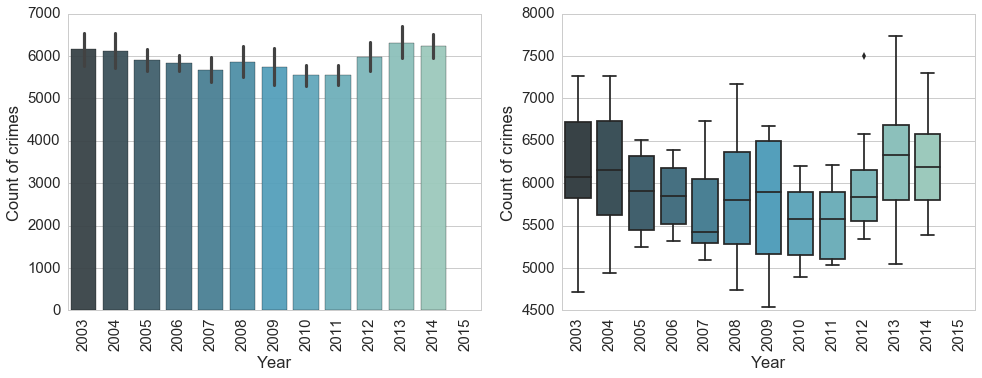

In [398]:
boxbar_main('Year','Month')

#### The overall crime rate appears to be relatively constant year-to-year.  

## Crimes per month (years 2003-2014)


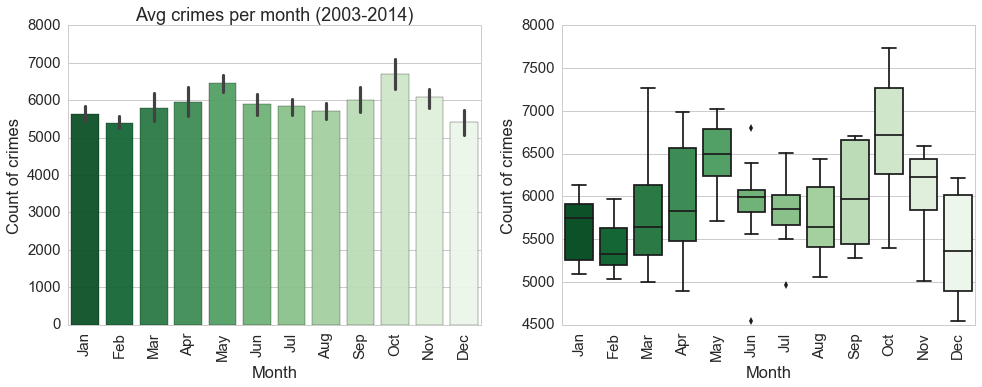

In [476]:
bar, box = boxbar_main('Month','Year')
bar.set_title('Avg crimes per month (2003-2014)')

#### Local maxima appear to occur in the months of May and October. Similarly, local minima in crime incidents appears to occur in December and Jan-Feb. 

## Crimes per day (per month from years 2003-2014)

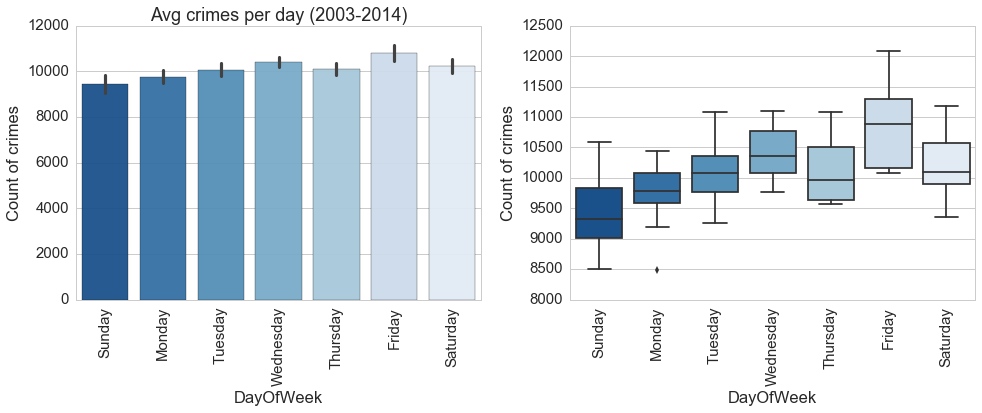

In [477]:
bar, box = boxbar_main('DayOfWeek','Year')
bar.set_title('Avg crimes per day (2003-2014)')

## Crimes per Hour of the Day (per month from years 2003-2014)

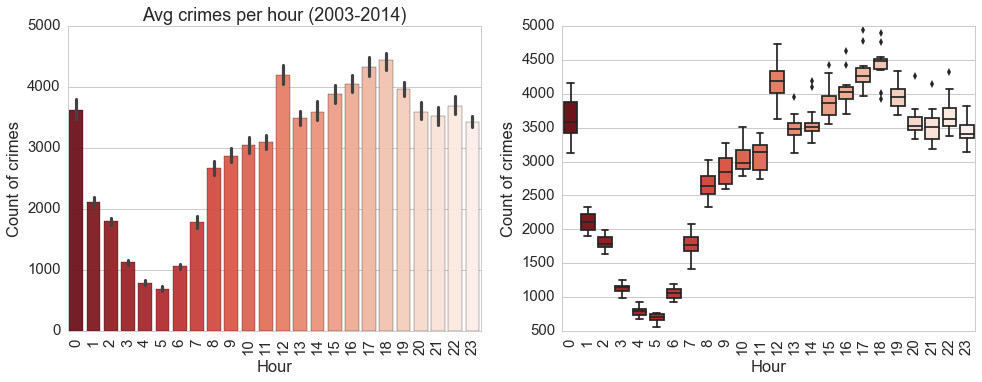

In [485]:
bar, box = boxbar_main('Hour','Month')
bar.set_title('Avg crimes per hour (2003-2014)')

#### Overnight crimes are typically low, however the number of crimes apppear to peak around 7 pm (hour 19:00). 

## MAP Crime data

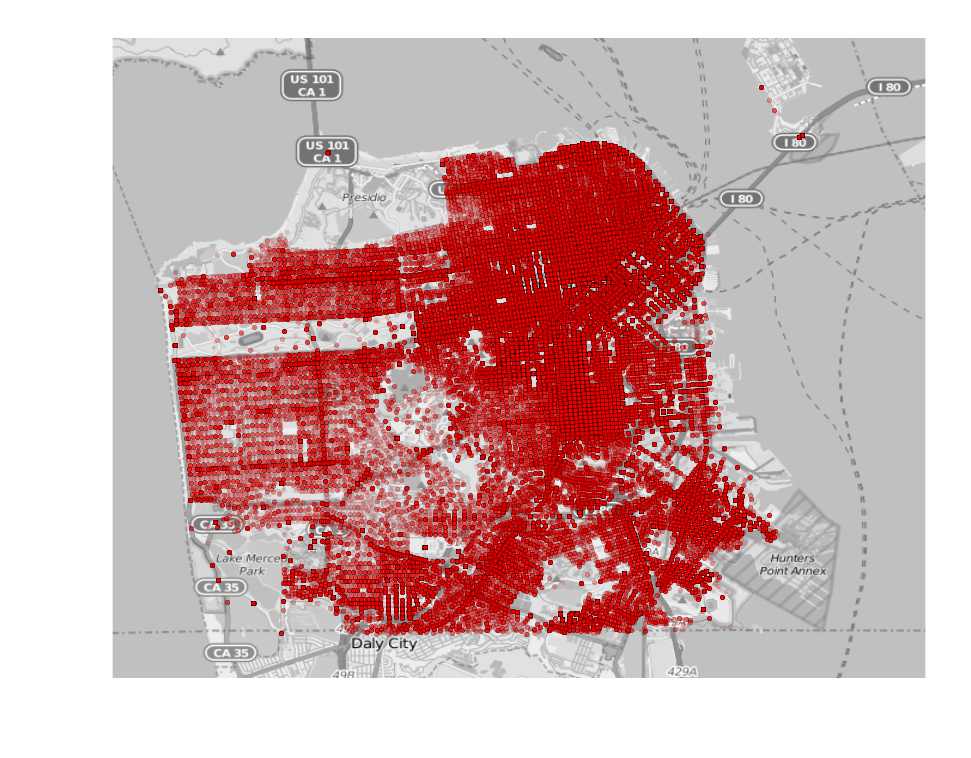

In [530]:
SF_map=np.loadtxt("/Users/KRich/GitHub/data/SF crime/SF_map.txt")

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
asp = SF_map.shape[0] * 1.0 / SF_map.shape[1]
fig = plt.figure(figsize=(16,16))
plt.imshow(SF_map,cmap='gray',extent=lon_lat_box,aspect=1/asp)
ax=plt.gca()
crime_data = crime_df
crime_data[(crime_data['Y']<40)].plot(x='X',y='Y',ax=ax,kind='scatter',marker='o',s=20,color='red',alpha=0.05)
ax.set_axis_off()

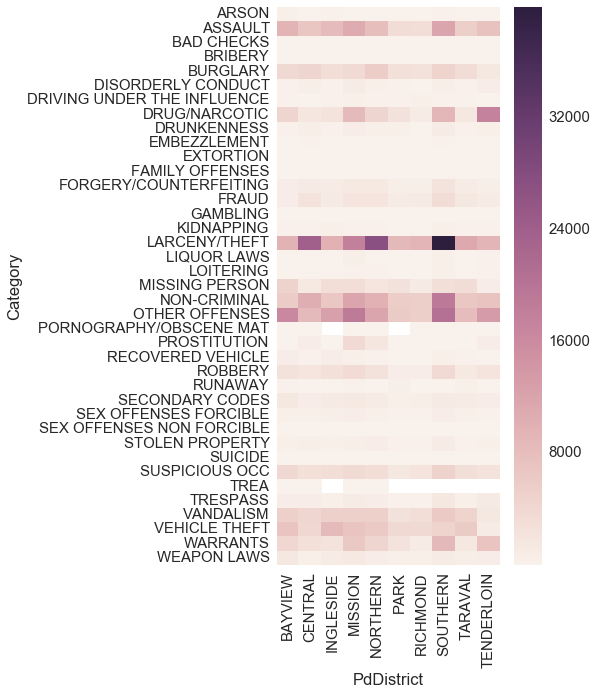

In [533]:
plt.figure(figsize=(5,10))
#-----------------------------------
# YEAR vs HOUR of DAY
# data
#  count
data_count = crime_df[["PdDistrict" ,"Category","Year"]].groupby(["PdDistrict" ,"Category"],as_index=False).count()
#  pivot to make an array
dfx = data_count.pivot("Category","PdDistrict" ,"Year")
# plot
#axis1 =  plt.subplot2grid((2,2),(0,0))
mapplot = sns.heatmap(dfx,
                     norm=LogNorm(vmin=dfx.min(), vmax=dfx.max()))

In [ ]:
plt.figure(figsize=(5,10))
#-----------------------------------
#data_count = crime_df[["X" ,"Y","Category"]].groupby(["X" ,"Y"],as_index=False).count()
#dfx = data_count.pivot("X","Y" ,"Category")
#mapplot = sns.heatmap(dfx)

# Other example visulization methods using Seaborn

### Lineplot (`seaborn.pointplot()`)

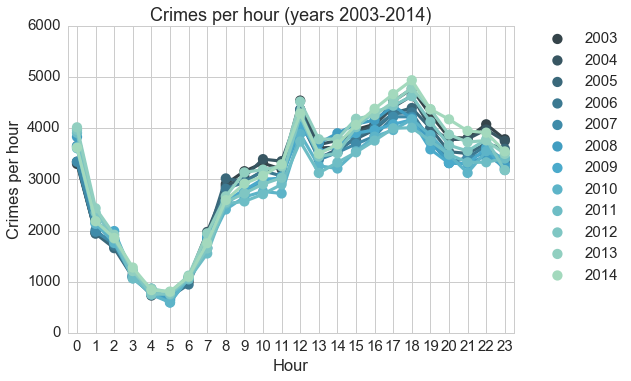

In [503]:
# data
data_count = crime_df[["Hour","Year" ,"Category"]].groupby(['Hour','Year'],as_index=False).count()
# plot   
plot = sns.pointplot(x=data_count.Hour,y=data_count.Category, # plot count data as a function of Hour
              order=order_Hour,    # order to plot data
              hue=data_count.Year, # different color for each year
              palette="GnBu_d")    # color scheme
# SET PROPERTIES
# put legend outside of box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# grid lines
plot.grid(b=True, which='major')
plot.grid(b=True, which='major')
# axes properties
plot.set_xlabel('Hour')
plot.set_ylabel('Crimes per hour')
plot.set_title('Crimes per hour (years 2003-2014)')

### Heat maps (`seaborn.heatmap()`)

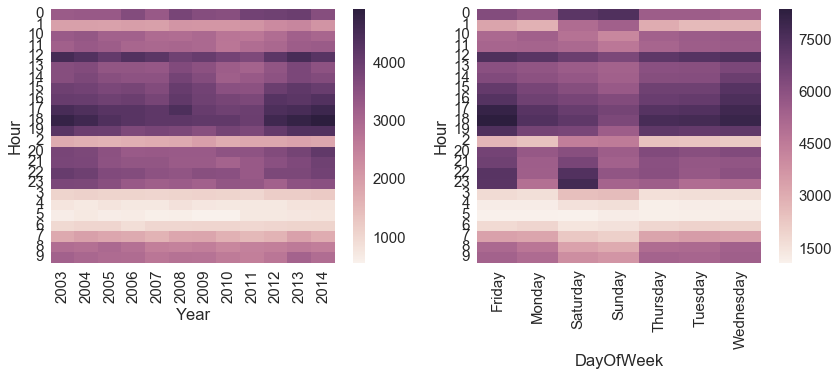

In [489]:
plt.figure(figsize=(14,10))

#-----------------------------------
# YEAR vs HOUR of DAY
# data
#  count
data_count = crime_df[["PdDistrict","Category"]].groupby(["PdDistrict","Category"],as_index=False).count()
#  pivot to make an array
dfx = data_count.pivot("Hour", "Year", "Category")
# plot
axis1 =  plt.subplot2grid((2,2),(0,0))
mapplot = sns.heatmap(dfx, ax = axis1)

#-----------------------------------
# DAY OF WEEK vs HOUR of DAY
#  count
data_count = crime_df[["Hour", "DayOfWeek", "Category"]].groupby(['Hour','DayOfWeek'],as_index=False).count()
#  pivot to make an array
dfx = Month_count.pivot("Hour", "DayOfWeek", "Category")
# plot
axis2 =  plt.subplot2grid((2,2),(0,1))
ax = sns.heatmap(dfx, ax=axis2)